In [115]:
import numpy as np

import utils.functions.func as f
import utils.graphs.data_visualization as data_viz


In [116]:
# Ulazne vrijednosti
time_period = 12
quantity_per_period = [200, 150, 100, 50, 50, 100, 150, 200, 200, 250, 300, 250]
setUp_cost = 500
holding_cost = 1
production_cost = 3
service_level = 0.92
mean_demand_shift = 0
std_dev_demand = 5
num_scenarios = 1000

# Generate stochastic demand scenarios using a normal distribution
# Shift deterministic demand by normal noise and ensure non-negative values
ssc = {
    0.70: 0.524, 0.75: 0.674, 0.80: 0.842, 0.81: 0.878, 0.82: 0.915, 0.83: 0.954, 0.84: 0.994, 0.85: 1.036, 0.86: 1.080, 0.87: 1.126, 0.88: 1.175,
    0.89: 1.227, 0.90: 1.282, 0.91: 1.341, 0.92: 1.405, 0.93: 1.476, 0.94: 1.555, 0.95: 1.645, 0.96: 1.751, 0.97: 1.881,
    0.98: 2.054, 0.99: 2.326, 0.995: 2.576
}
normal_scenarios = np.random.normal(mean_demand_shift, std_dev_demand, (num_scenarios, time_period)) + quantity_per_period
normal_scenarios = np.clip(normal_scenarios, 0, None).astype(int)  # Ensure non-negative demand

# Calculate safety stock for 95% service level
z_score = ssc[service_level]  # For 95% service level
safety_stock = np.ceil(z_score * std_dev_demand).astype(int)

# Adjust demand for safety stock
normal_scenarios_with_safety_stock = normal_scenarios + safety_stock

# Apply Wagner-Whitin for each normal distribution scenario
costs_normal, optimal_schedules_normal = f.wagner(normal_scenarios_with_safety_stock, time_period, setUp_cost, holding_cost)

# Compute average cost and most frequent schedule for normal distribution
average_cost_normal = np.mean(costs_normal)
optimal_schedule_summary_normal = optimal_schedules_normal[np.argmin(costs_normal)]

#average_cost_normal, safety_stock, optimal_schedule_summary_normal



In [117]:
average_cost_normal


3854.351

In [118]:
optimal_schedule_summary_normal

[(1, 5, 561), (6, 8, 477), (9, 10, 455), (11, 12, 549)]

In [119]:
# Izrada tablice za prikaz potražnje kroz vrijeme

data = f.quantities_table(quantity_per_period, time_period)

data


,Period,Forecast
0,1,200
1,2,150
2,3,100
3,4,50
4,5,50
5,6,100
6,7,150
7,8,200
8,9,200
9,10,250


In [120]:
costs, schedule=f.wagner2(quantity_per_period, time_period, setUp_cost, holding_cost)
schedule_summary =schedule[np.argmin(costs)]

dr = f.create_detailed_schedule(schedule_summary, quantity_per_period, time_period, setUp_cost, holding_cost, production_cost)
dr

,Period,Forecast,Production,Inventory on Hold,Holding Costs,Set-Up Costs,Total Costs(inc. Production)
0,1,200,550,350,350,500,2500
1,2,150,0,200,200,0,200
2,3,100,0,100,100,0,100
3,4,50,0,50,50,0,50
4,5,50,0,0,0,0,0
5,6,100,450,350,350,500,2200
6,7,150,0,200,200,0,200
7,8,200,0,0,0,0,0
8,9,200,450,250,250,500,2100
9,10,250,0,0,0,0,0


In [121]:
# Izrada nove tablice u kojoj radimo izračun
data_calc = data.copy()

for i in data_calc['Period'].unique():
    data_calc['Order {}'.format(i)] = 0

data_calc

,Period,Forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,0,0,0,0,0,0,0,0,0,0,0,0
1,2,150,0,0,0,0,0,0,0,0,0,0,0,0
2,3,100,0,0,0,0,0,0,0,0,0,0,0,0
3,4,50,0,0,0,0,0,0,0,0,0,0,0,0
4,5,50,0,0,0,0,0,0,0,0,0,0,0,0
5,6,100,0,0,0,0,0,0,0,0,0,0,0,0
6,7,150,0,0,0,0,0,0,0,0,0,0,0,0
7,8,200,0,0,0,0,0,0,0,0,0,0,0,0
8,9,200,0,0,0,0,0,0,0,0,0,0,0,0
9,10,250,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
# Računanje mogućih troškova za prvi mjesec - Wagner-Within metoda
data_calc = f.first_order(setUp_cost, holding_cost, data_calc)

data_calc

,Period,Forecast,Order 1,Order 2,Order 3,Order 4,Order 5,Order 6,Order 7,Order 8,Order 9,Order 10,Order 11,Order 12
0,1,200,500,0,0,0,0,0,0,0,0,0,0,0
1,2,150,650,0,0,0,0,0,0,0,0,0,0,0
2,3,100,850,0,0,0,0,0,0,0,0,0,0,0
3,4,50,1000,0,0,0,0,0,0,0,0,0,0,0
4,5,50,1200,0,0,0,0,0,0,0,0,0,0,0
5,6,100,1700,0,0,0,0,0,0,0,0,0,0,0
6,7,150,2600,0,0,0,0,0,0,0,0,0,0,0
7,8,200,4000,0,0,0,0,0,0,0,0,0,0,0
8,9,200,5600,0,0,0,0,0,0,0,0,0,0,0
9,10,250,7850,0,0,0,0,0,0,0,0,0,0,0


In [123]:
# Računanje mogućih troškova za sve ostale mjesece - Wagner-Within metoda
data_calc = f.other_orders(setUp_cost, holding_cost, data_calc, time_period)
data_calc = data_calc.set_index('Period').drop(['Forecast'], axis = 1).T

data_calc

Period,1,2,3,4,5,6,7,8,9,10,11,12
Order 1,500,650,850,1000,1200,1700,2600,4000,5600,7850,10850,13600
Order 2,0,1000,1100,1200,1350,1750,2500,3700,5100,7100,9800,12300
Order 3,0,0,1150,1200,1300,1600,2200,3200,4400,6150,8550,10800
Order 4,0,0,0,1350,1400,1600,2050,2850,3850,5350,7450,9450
Order 5,0,0,0,0,1500,1600,1900,2500,3300,4550,6350,8100
Order 6,0,0,0,0,0,1700,1850,2250,2850,3850,5350,6850
Order 7,0,0,0,0,0,0,2100,2300,2700,3450,4650,5900
Order 8,0,0,0,0,0,0,0,2350,2550,3050,3950,4950
Order 9,0,0,0,0,0,0,0,0,2750,3000,3600,4350
Order 10,0,0,0,0,0,0,0,0,0,3050,3350,3850


In [124]:
# Pronalazak optimalnog plana proizvodnje
# Idemo unazad kroz tablicu i tražimo put s najmanjim troškovima - Wagner-Within metoda
df_results = f.backward(time_period, data, data_calc)

df_results

,initial,nexts,cost,quantity
backward,,,,
1,12,11,3750,550
2,10,9,3000,450
3,8,6,2250,450
4,5,1,1200,550


In [125]:
# Cost table for Wagner-Whitin method with fixed demand
results_final = f.calculation(setUp_cost, holding_cost, production_cost, df_results, data)
results_final


,Period,Forecast,Production,Inventory on Hold,Holding Cost,Set-Up Costs,Total Costs(inc. Production)
0,1,200,550,350,350,500,2500
1,2,150,0,200,200,0,200
2,3,100,0,100,100,0,100
3,4,50,0,50,50,0,50
4,5,50,0,0,0,0,0
5,6,100,450,350,350,500,2200
6,7,150,0,200,200,0,200
7,8,200,0,0,0,0,0
8,9,200,450,250,250,500,2100
9,10,250,0,0,0,0,0


In [126]:
# Cost table for Wagner-Whitin method with Stohastic demand

detailed_schedule_df_no_leftovers = f.create_detailed_schedule_no_leftovers(
    optimal_schedule_summary_normal, quantity_per_period, time_period, setUp_cost, holding_cost, production_cost
)

detailed_schedule_df_no_leftovers

,Period,Forecast,Production,Inventory on Hold,Holding Costs,Set-Up Costs,Total Costs(inc. Production)
0,1,200,561,361,361,500,2544
1,2,150,0,211,211,0,211
2,3,100,0,111,111,0,111
3,4,50,0,61,61,0,61
4,5,50,0,11,11,0,11
5,6,100,477,388,388,500,2319
6,7,150,0,238,238,0,238
7,8,200,0,38,38,0,38
8,9,200,455,293,293,500,2158
9,10,250,0,43,43,0,43


In [127]:
total_cost1 = results_final['Total Costs(inc. Production)'].sum()
total_cost2 = detailed_schedule_df_no_leftovers['Total Costs(inc. Production)'].sum()

print("Ukupan trošak Wagner-Whitin metode sa fiksnom potražnjom je {}e a kada uzmemo u obzir standardnu devijaciju potražnje i sigurnosne količine onda je trošak {}e".format(total_cost1, total_cost2))

Ukupan trošak Wagner-Whitin metode sa fiksnom potražnjom je 9750e a kada uzmemo u obzir standardnu devijaciju potražnje i sigurnosne količine onda je trošak 10005e


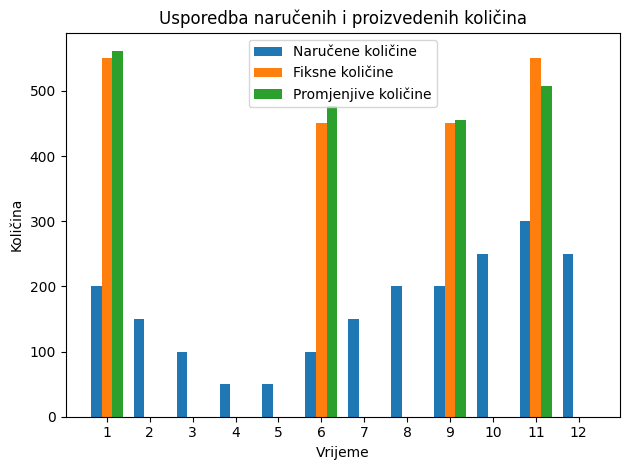

In [128]:
# Graf koji prikazuje tražene količine za isporuku i proizvedene količine
forecast_production=data_viz.forecast_and_production(results_final, detailed_schedule_df_no_leftovers)
forecast_production


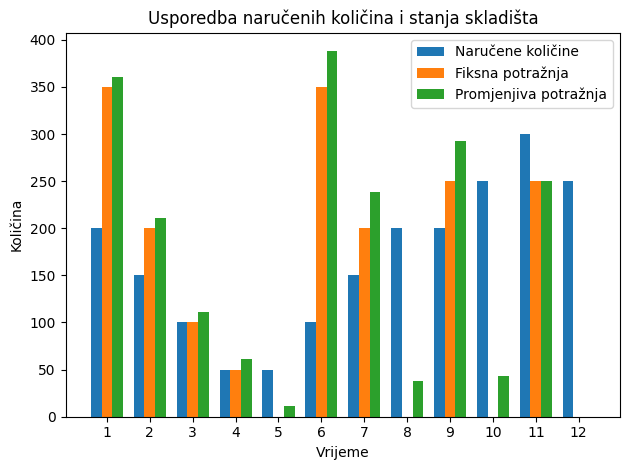

In [129]:
# Graf koji prikazuje zalihe i proizvedene količine
inventory=data_viz.inventory(results_final, detailed_schedule_df_no_leftovers)

inventory

In [130]:
# Tablica za usporedbu troškova
usporedba_troskova = f.cost_comparison(setUp_cost, production_cost, holding_cost, time_period, results_final, detailed_schedule_df_no_leftovers)
usporedba_troskova

,Standard Costs,Optimal Costs,Stohastic Costs,Monthly Savings Normal,Monthly Savings Stohastic Method
1,1100,2500,2544,-1400,-1444
2,2050,2700,2755,-650,-705
3,2850,2800,2866,50,-16
4,3500,2850,2927,650,573
5,4150,2850,2938,1300,1212
6,4950,5050,5257,-100,-307
7,5900,5250,5495,650,405
8,7000,5250,5533,1750,1467
9,8100,7350,7691,750,409
10,9350,7350,7734,2000,1616


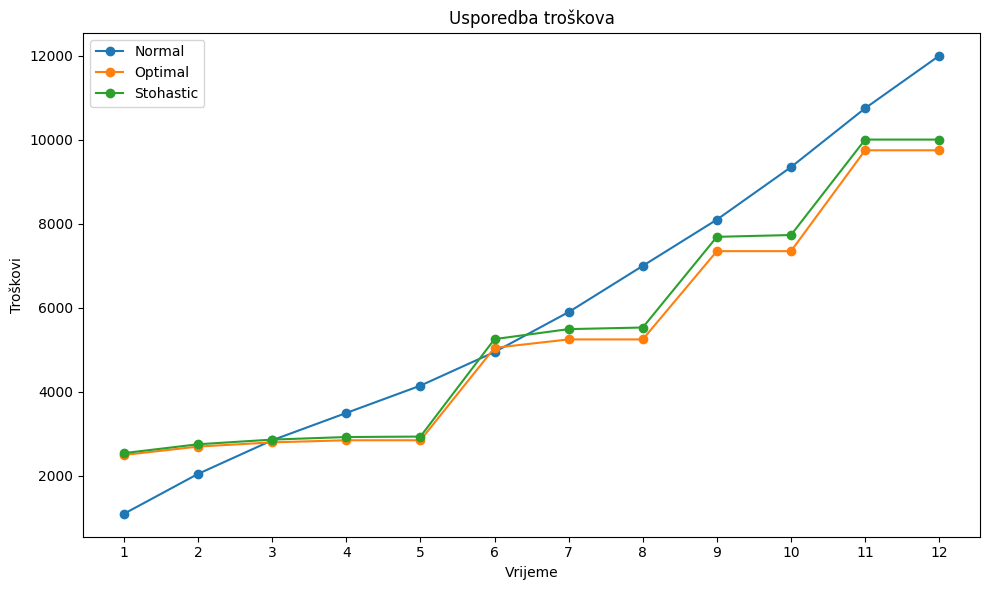

In [131]:
# Graf koji prikazuje akumulaciju troškova kroz vrijeme
data_viz.normal_vs_optimal_costs(usporedba_troskova)

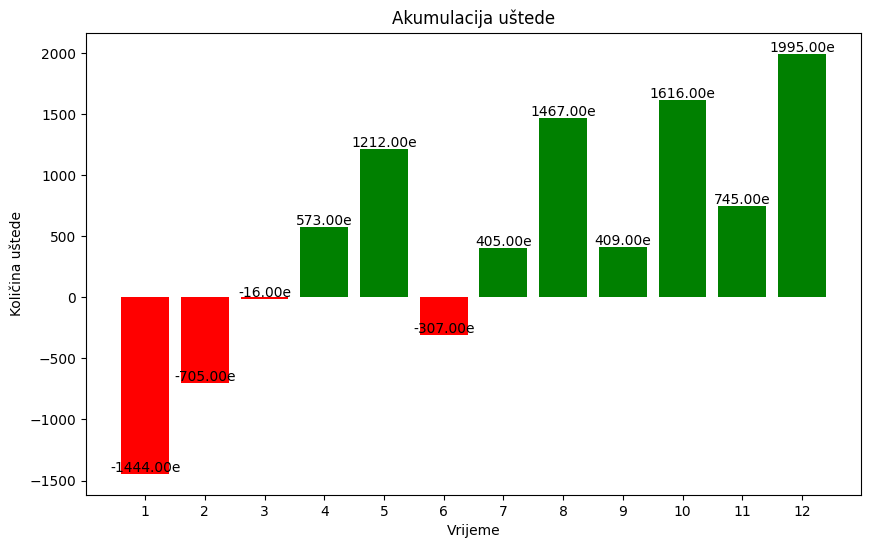

In [132]:
# Graf koji prikazuje akumulaciju uštede kroz vrijeme za Stohastički model
data_viz.savings(usporedba_troskova)

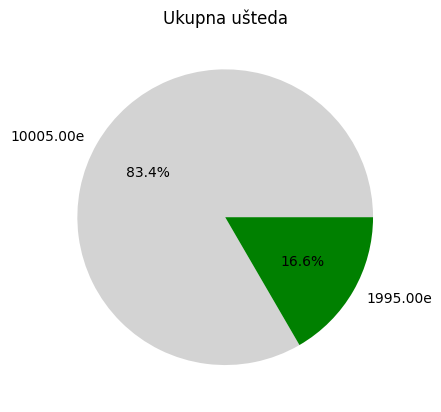

In [133]:
# Graf koji prikazuje postotak uštede za Stohastički model
data_viz.usteda(usporedba_troskova['Stohastic Costs'].iloc[-1], usporedba_troskova['Monthly Savings Stohastic Method'].iloc[-1])